In [3]:
#import out basic plotting tools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#load in the data file using pandas
#these initial data files were created using the maxquant software to search raw mass spec files.
df = pd.io.parsers.read_csv('/home/bill/next100genes/massspec/all/proteinGroups1Apr19.txt',sep='\t')

In [5]:
def pboc_style_mpl():
    """
    Formats matplotlib plotting enviroment to that used in
    Physical Biology of the Cell, 2nd edition.
    """
    rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 8,
          'axes.titlesize': 9,
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
          'legend.fontsize': 8,
          'figure.dpi': 300,
          'savefig.dpi': 300}
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=-1)
    plt.rc('ytick.major', pad=-1)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[3.5, 2.5])
    plt.rc('svg', fonttype='none')
    plt.rc('legend', title_fontsize='8', frameon=True,
           facecolor='#E3DCD0', framealpha=1)
    sns.set_style('darkgrid', rc=rc)
    sns.set_palette("colorblind", color_codes=True)
    sns.set_context('notebook', rc=rc)
    
#run the style conversion
pboc_style_mpl()

In [203]:
#first we will draw out only the columns that have the data we need. This is the protein names
#and the normalized ratios from the proteins.
#the normalization is done by the maxquant program automatically.
column_name = 'Ratio H/L normalized D3_2_2Apr'
enrichment = df[['Protein names',column_name]]

In [204]:
#Some entries will have missing data. These will have not a number entries. We remove these.
enrichment2 = enrichment.dropna()

In [6]:
#We will view only those proteins that bind to DNA as only they could be transcription factors.
def check_DNA(s):
    if 'DNA' in s or 'HTH' in s or 'Transcriptional' in s or 'repress' in s or 'transcript' in s or 'activator' in s or 'regulator' in s:
        return True
    else:
        return False

In [188]:
#apply the check_dna function and then keep only the DNA binding rows
goodrows = enrichment2['Protein names'].apply(check_DNA)

enrichment3 = enrichment2[goodrows]

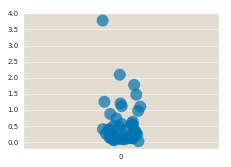

In [191]:
#plot the results.
fig,ax = plt.subplots()
ax.set_ylabel('enrichment')
sns.stripplot(data= list(enrichment3[column_name]),jitter=True,size=12,alpha=.7)
plt.show()